In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow.keras.datasets import mnist


(x_train, y_train), (x_test, y_test) = mnist.load_data()


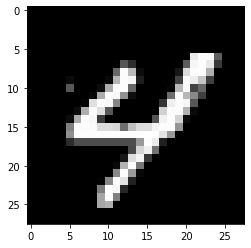

In [2]:
# Select an image from the dataset
img = x_train[89]

# Plot the image
plt.imshow(img, cmap='gray')
plt.show()


In [3]:
print("The shape of x_train.shape is:", x_train.shape)
print("the shape of x_train.shape is:", y_train.shape)

The shape of x_train.shape is: (60000, 28, 28)
the shape of x_train.shape is: (60000,)


In [4]:
inputs = x_train.reshape((60000, 28*28))[0:1000].T
print("the new shape is: " ,inputs.shape)

outputs = y_train[0:1000]
print("the new output shape is:" , outputs.shape)

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    
    one_hot_Y[np.arange(Y.shape[0]), Y] = 1
    one_hot_Y = one_hot_Y
    return one_hot_Y

outputs = one_hot(outputs).T

print(outputs.shape)
print(outputs[:,99])
print(y_train[99])


the new shape is:  (784, 1000)
the new output shape is: (1000,)
(10, 1000)
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
1


In [5]:
def init_params():
    W1 = np.random.randn(10, 784)
    b1 = np.random.randn(10, 1)
    W2 = np.random.randn(10, 10)
    b2 = np.random.randn(10, 1)
    
    return W1,b1,W2,b2


def ReLU(Z):
    return np.maximum(Z,0)

def SoftMax(z):
    z = z - np.max(z, axis = 1).reshape(z.shape[0],1)
    return np.exp(z) / np.sum(np.exp(z), axis = 1).reshape(z.shape[0],1)


def forward_prop(W1,W2,b1,b2,X):
    Z1 = np.dot(W1,X) + b1
    A1 = ReLU(Z1)
    Z2 = np.dot(W2,A1) + b2
    A2 = SoftMax(Z2)
    return Z1,A1,Z2,A2

def deriv_ReLU(Z):
    return (Z>0)*1

def loss(A2,Y):
    return A2-Y

    

def back_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    m = Y.size
    
    dZ2 = loss(A2,Y)
    dW2 = (1/m)*np.dot(dZ2, A1.T)
    db2 = (1/m)*np.sum(dZ2)

    
    dZ1 = np.dot(W2, dZ2) * (deriv_ReLU(Z1))*(1/m)
    dW1 = (1/m)*np.dot(dZ1, X.T)
    db1 = (1/m)*np.sum(dZ1)
    
    return dW1, db1, dW2, db2

def update_params(dW1, db1, dW2, db2,W1,W2,b1,b2, alpha):
    
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2

    return W1,b1,W2,b2

def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X,Y, iterations,alpha):
    W1, b1, W2, b2, = init_params()
    
    for i in range(iterations):
        
        Z1,A1,Z2,A2 = forward_prop(W1,W2,b1,b2,X)
        dW1, db1, dW2, db2 = back_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1,b1,W2,b2= update_params(dW1, db1, dW2, db2, W1,W2,b1,b2, alpha)
        
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))

    return W1,b1,W2,b2
        
    
    

    
    
    


In [6]:
W1, b1, W2, b2 = gradient_descent(inputs,outputs,500,0.001)

outputs.shape

Iteration:  0
0.8786
Iteration:  10
0.8788
Iteration:  20
0.8852
Iteration:  30
0.8903
Iteration:  40
0.892
Iteration:  50
0.8929
Iteration:  60
0.8938
Iteration:  70
0.8938
Iteration:  80
0.8922
Iteration:  90
0.8939
Iteration:  100
0.8947
Iteration:  110
0.8947
Iteration:  120
0.8938
Iteration:  130
0.8938
Iteration:  140
0.8938
Iteration:  150
0.8929
Iteration:  160
0.8929
Iteration:  170
0.8929
Iteration:  180
0.8947
Iteration:  190
0.8947
Iteration:  200
0.8956
Iteration:  210
0.8956
Iteration:  220
0.8956
Iteration:  230
0.8956
Iteration:  240
0.8956
Iteration:  250
0.8956
Iteration:  260
0.8965
Iteration:  270
0.8965
Iteration:  280
0.8965
Iteration:  290
0.8958
Iteration:  300
0.8958
Iteration:  310
0.8958
Iteration:  320
0.8958
Iteration:  330
0.8958
Iteration:  340
0.8958
Iteration:  350
0.8958
Iteration:  360
0.8966
Iteration:  370
0.8966
Iteration:  380
0.8966
Iteration:  390
0.8965
Iteration:  400
0.8965
Iteration:  410
0.8974
Iteration:  420
0.8974
Iteration:  430
0.8974


(10, 1000)

In [7]:
test = np.reshape(inputs[:,1],(784,1))


Z1 = np.dot(W1,test) + b1
A1 = ReLU(Z1)
Z2 = np.dot(W2,A1) + b2
A2 = SoftMax(Z2)

print(A2)




[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]


In [72]:
A2.shape

(10, 1000)

In [73]:
Z1.shape

(10, 1000)

In [74]:
W1.shape

(10, 784)

In [75]:
b1.shape

(10, 1000)